# **PENERAPAN MARKET BASKET ANALYSIS MENGGUNAKAN ALGORITMA APRIORI UNTUK REKOMENDASI STOK BAHAN BAKU PADA BISNIS KULINER**

# 1. Import Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [31]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 2. Load Dataset

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df = pd.read_csv('/content/drive/MyDrive/Semester 5/Big Data & Data Mining/UAS/chipotle.tsv', sep='\t')

# 3. Preprocessing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [35]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [36]:
df.isnull().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0


In [37]:
# @title 3.1 Cleansing
df['item_price'] = df['item_price'].astype(str).str.replace('$', '').astype(float)

In [38]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [39]:
# @title 3.2 Data Transformation
basket = (df.groupby(['order_id', 'item_name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [40]:
basket.head()

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,Canned Soft Drink,Carnitas Bowl,Carnitas Burrito,Carnitas Crispy Tacos,Carnitas Salad,Carnitas Salad Bowl,Carnitas Soft Tacos,Chicken Bowl,Chicken Burrito,Chicken Crispy Tacos,Chicken Salad,Chicken Salad Bowl,Chicken Soft Tacos,Chips,Chips and Fresh Tomato Salsa,Chips and Guacamole,Chips and Mild Fresh Tomato Salsa,Chips and Roasted Chili Corn Salsa,Chips and Roasted Chili-Corn Salsa,Chips and Tomatillo Green Chili Salsa,Chips and Tomatillo Red Chili Salsa,Chips and Tomatillo-Green Chili Salsa,Chips and Tomatillo-Red Chili Salsa,Crispy Tacos,Izze,Nantucket Nectar,Salad,Side of Chips,Steak Bowl,Steak Burrito,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# @title 3.3 Encoding
def hot_encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [42]:
basket_encoded = basket.map(hot_encode)

basket_encoded.head()

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,Canned Soft Drink,Carnitas Bowl,Carnitas Burrito,Carnitas Crispy Tacos,Carnitas Salad,Carnitas Salad Bowl,Carnitas Soft Tacos,Chicken Bowl,Chicken Burrito,Chicken Crispy Tacos,Chicken Salad,Chicken Salad Bowl,Chicken Soft Tacos,Chips,Chips and Fresh Tomato Salsa,Chips and Guacamole,Chips and Mild Fresh Tomato Salsa,Chips and Roasted Chili Corn Salsa,Chips and Roasted Chili-Corn Salsa,Chips and Tomatillo Green Chili Salsa,Chips and Tomatillo Red Chili Salsa,Chips and Tomatillo-Green Chili Salsa,Chips and Tomatillo-Red Chili Salsa,Crispy Tacos,Izze,Nantucket Nectar,Salad,Side of Chips,Steak Bowl,Steak Burrito,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# 4. EXPLORATORY DATA ANALYSIS

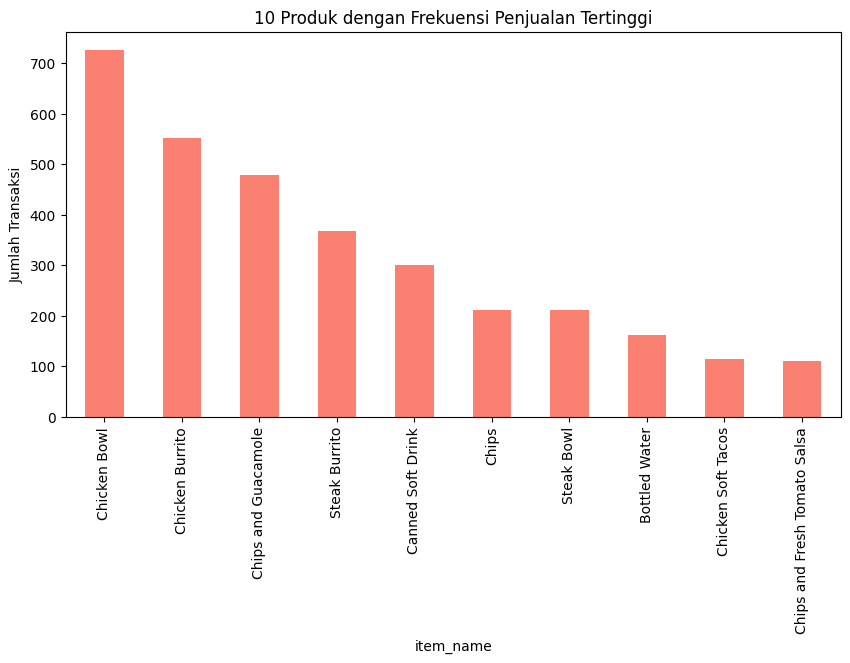

In [43]:
# EDA: Visualisasi 10 Produk Paling Sering Muncul (Stok Utama)
top_items = df['item_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_items.plot(kind='bar', color='salmon')
plt.title('10 Produk dengan Frekuensi Penjualan Tertinggi')
plt.ylabel('Jumlah Transaksi')
plt.show()

# 5. Modeling

In [44]:
# @title 5.1 Mencari Frequent Item
frequent_items = apriori(basket_encoded, min_support=0.01, use_colnames=True)

In [45]:
frequent_items

,support,itemsets
0,0.029444,(6 Pack Soft Drink)
1,0.033261,(Barbacoa Bowl)
2,0.047983,(Barbacoa Burrito)
3,0.013631,(Barbacoa Soft Tacos)
4,0.083969,(Bottled Water)
...,...,...
75,0.014722,"(Chips and Guacamole, Veggie Bowl)"
76,0.016903,"(Chips and Guacamole, Veggie Burrito)"
77,0.015267,"(Bottled Water, Chicken Bowl, Chips)"
78,0.019084,"(Chicken Bowl, Chips, Canned Soft Drink)"


In [46]:
# @title 5.2 Membuat Rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(6 Pack Soft Drink),(Chicken Burrito),0.029444,0.266630,0.010360,0.351852,1.319624,1.0,0.002509,1.131485,0.249556,0.036260,0.116205,0.195353
1,(Chicken Burrito),(6 Pack Soft Drink),0.266630,0.029444,0.010360,0.038855,1.319624,1.0,0.002509,1.009791,0.330268,0.036260,0.009696,0.195353
2,(Chips and Guacamole),(6 Pack Soft Drink),0.258451,0.029444,0.011450,0.044304,1.504688,1.0,0.003841,1.015549,0.452311,0.041420,0.015311,0.216596
3,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,1.0,0.003841,1.213443,0.345586,0.041420,0.175899,0.216596
4,(Bottled Water),(Chicken Bowl),0.083969,0.335333,0.037623,0.448052,1.336142,1.0,0.009465,1.204221,0.274638,0.098571,0.169588,0.280124


# 6. Evaluasi

In [47]:
best_rules = rules[ (rules['lift'] >= 1) &
                    (rules['confidence'] >= 0.2) ]

best_rules = best_rules.sort_values(by='lift', ascending=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                              antecedents          consequents   support  confidence      lift
36          (Bottled Water, Chicken Bowl)              (Chips)  0.015267    0.405797  3.578038
43      (Chicken Bowl, Canned Soft Drink)              (Chips)  0.019084    0.315315  2.780232
38                  (Chicken Bowl, Chips)      (Bottled Water)  0.015267    0.229508  2.733234
37                 (Bottled Water, Chips)       (Chicken Bowl)  0.015267    0.800000  2.385691
10                          (Canned Soda)      (Steak Burrito)  0.019629    0.382979  2.053751
6                         (Bottled Water)              (Chips)  0.019084    0.227273  2.003934
42                  (Chicken Bowl, Chips)  (Canned Soft Drink)  0.019084    0.286885  1.906332
21  (Chips and Tomatillo Red Chili Salsa)       (Chicken Bowl)  0.015812    0.630435  1.880028
17                    (Canned Soft Drink)              (Chips)  0.031625    0.210145  1.852912
16                                (Chips)  (Canned

In [48]:
stok_rules = best_rules[best_rules['confidence'] > 0.5]

print("Rekomendasi Pengendalian Stok\n")
for i, row in best_rules.iterrows():
    items_awal = ", ".join(list(row['antecedents']))
    item_tujuan = ", ".join(list(row['consequents']))

    if row['confidence'] > 0.5:
        print(f"Jika pelanggan membeli [{items_awal}], siapkan stok [{item_tujuan}] minimal {row['confidence']*100:.0f}% dari total transaksi tersebut.")

Rekomendasi Pengendalian Stok

Jika pelanggan membeli [Bottled Water, Chips], siapkan stok [Chicken Bowl] minimal 80% dari total transaksi tersebut.
Jika pelanggan membeli [Chips and Tomatillo Red Chili Salsa], siapkan stok [Chicken Bowl] minimal 63% dari total transaksi tersebut.
Jika pelanggan membeli [Chips, Canned Soft Drink], siapkan stok [Chicken Bowl] minimal 60% dari total transaksi tersebut.
Jika pelanggan membeli [Chips], siapkan stok [Chicken Bowl] minimal 59% dari total transaksi tersebut.


# 7. Visualisasi

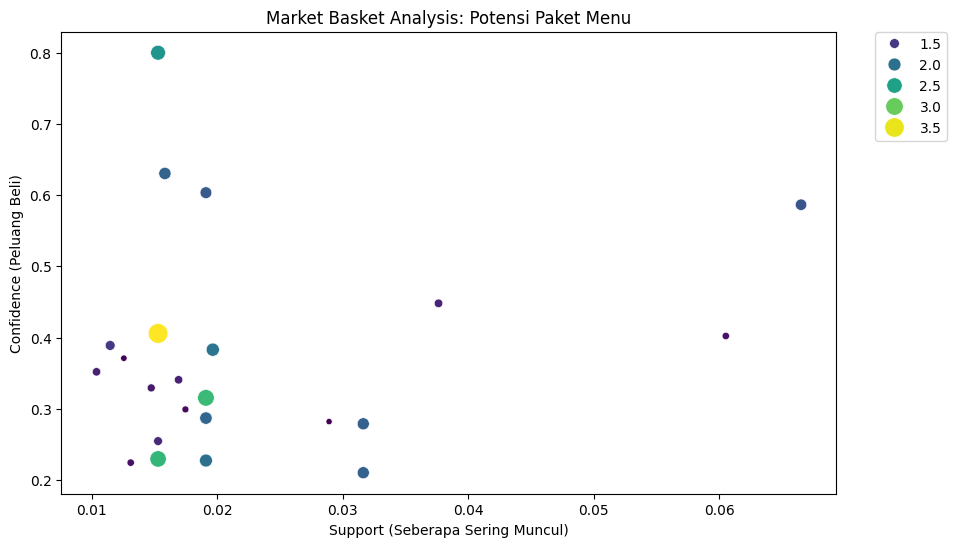

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=best_rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Market Basket Analysis: Potensi Paket Menu')
plt.xlabel('Support (Seberapa Sering Muncul)')
plt.ylabel('Confidence (Peluang Beli)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [50]:
import pickle

# Menyimpan hasil rules ke dalam file .pkl
with open('model_apriori_stok.pkl', 'wb') as f:
    pickle.dump(best_rules, f)

print("Model berhasil disimpan!")

Model berhasil disimpan!
